# Customer Segmentation

본 대회의 주제는 이커머스 기업의 **고객을 세분화**하여 현재 기업의 상황을 판단하고, 해당 솔루션에 맞는 솔루션을 제시하는 것입니다.  
이를 위해 베이스라인에서는 기본적인 EDA를 수행한 후, 여러가지 방법으로 고객을 분류하겠습니다. 

### 라이브러리 불러오기(시각화 및 한글폰트) 

베이스라인을 위해 필요한 라이브러리들을 불러옵니다. 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import datetime as dt

# 한글 폰트 설정하기
# fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
# fm.fontManager.ttflist.insert(0, fe)
# plt.rc('font', family='MaruBuri')

### 데이터 로드

대회 데이터를 불러옵니다. 

In [9]:
online_sales = pd.read_csv('data/Onlinesales_info.csv')
customers_data = pd.read_csv('data/Customer_info.csv')
discount_coupon = pd.read_csv('data/Discount_info.csv')
marketing_spend = pd.read_csv('data/Marketing_info.csv')
tax_amount = pd.read_csv('data/Tax_info.csv')

### 데이터 관찰하기

불러온 데이터를 관찰해 봅시다. 대표적으로 onlines_sales를 확인해 보겠습니다. 

In [10]:
print(online_sales.shape)
online_sales.head()

(52924, 9)


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


### 시간에 따른 거래량 확인하기

시간에 따른 거래량을 시각화로 파악해보겠습니다. 

In [11]:
# 'Transaction_Date' 컬럼을 날짜 타입으로 변환하고 월별로 집계
# 'Month' 컬럼으로 거래량 계산
counts_by_month = online_sales.assign(Month=pd.to_datetime(online_sales['거래날짜']).dt.to_period('M'))['Month'].value_counts().sort_index()
counts_by_month

Month
2019-01    4063
2019-02    3284
2019-03    4346
2019-04    4150
2019-05    4572
2019-06    4193
2019-07    5251
2019-08    6150
2019-09    4288
2019-10    4164
2019-11    3961
2019-12    4502
Freq: M, Name: count, dtype: int64

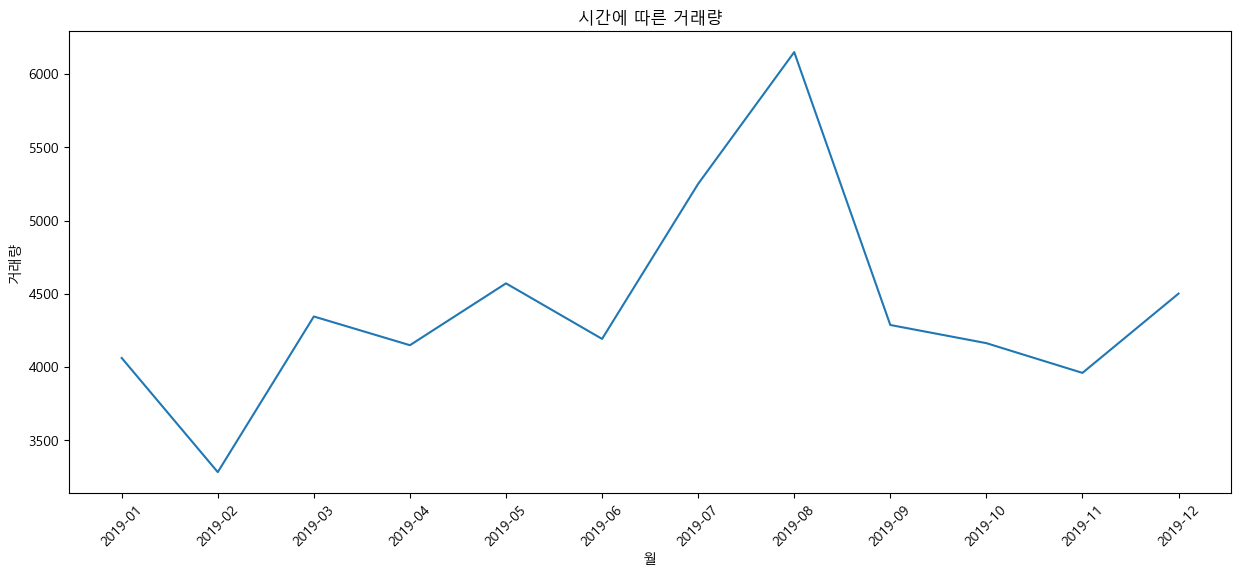

In [12]:
# 시간에 따른 거래량 선 그래프 그리기
plt.figure(figsize=(15, 6))
sns.lineplot(x=counts_by_month.index.astype(str), y=counts_by_month.values)
plt.title('시간에 따른 거래량')
plt.xlabel('월')
plt.ylabel('거래량')
plt.xticks(rotation=45)
plt.show()

### 성별에 따른 고객 분류

고객을 성별에 따라 분류해보겠습니다. 

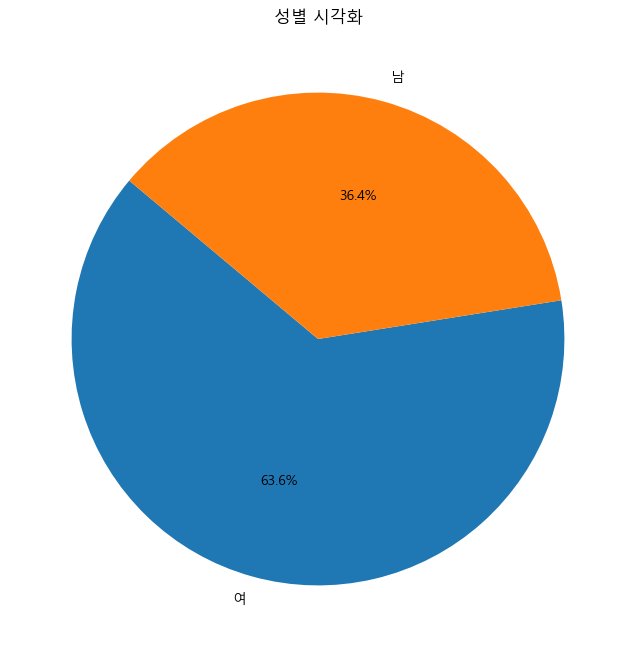

In [13]:
gender_counts = customers_data['성별'].value_counts()

# 원그래프 그리기
plt.figure(figsize=(8, 8))  # 그래프 크기 설정
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)  # 원그래프 그리기
plt.title('성별 시각화')  # 그래프 제목 설정
plt.show()  # 그래프 보여주기

### 지역에 따른 고객 분류

고객을 지역에 따라 분류해보겠습니다. 

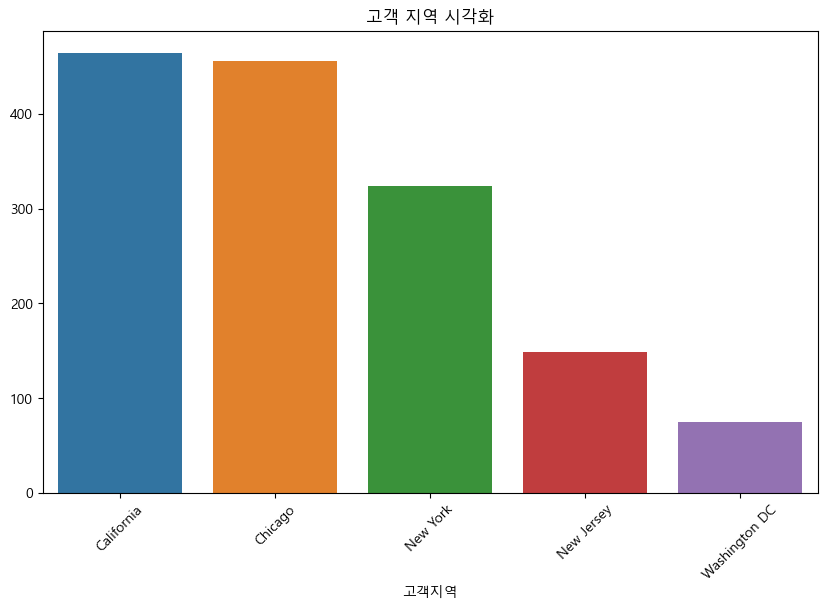

In [14]:
# customers_data에서 '고객지역' 열을 사용하여 지역별 거래량 계산
location_counts = customers_data['고객지역'].value_counts()

# 바 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(x=location_counts.index, y=location_counts.values)  # seaborn을 사용한 바 그래프 그리기
plt.title('고객 지역 시각화')  # 그래프 제목 설정
plt.xlabel('고객지역')  # x축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()  # 그래프 보여주기

### RFM 고객 세분화 분석

이제 RFM 방법을 사용해서 고객을 세분화해보겠습니다. 

In [15]:
# 원본 데이터셋 복사
rfm_online_sales = online_sales.copy()

# 날짜 형식 변환
rfm_online_sales['거래날짜'] = pd.to_datetime(rfm_online_sales['거래날짜'])

# 데이터 내 마지막 날짜 계산
last_date = rfm_online_sales['거래날짜'].max()

# Recency 계산
recency_data = rfm_online_sales.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['거래날짜']).dt.days

In [16]:
# Frequency 계산
frequency_data = rfm_online_sales.groupby('고객ID')['거래ID'].count().reset_index()
frequency_data.rename(columns={'거래ID': 'Frequency'}, inplace=True)
frequency_data

,고객ID,Frequency
0,USER_0000,2
1,USER_0001,60
2,USER_0002,23
3,USER_0003,17
4,USER_0004,36
...,...,...
1463,USER_1463,7
1464,USER_1464,40
1465,USER_1465,8
1466,USER_1466,1


In [8]:
# Monetary 계산
rfm_online_sales['SalesValue'] = rfm_online_sales['수량'] * rfm_online_sales['평균금액']
monetary_data = rfm_online_sales.groupby('고객ID')['SalesValue'].sum().reset_index()
monetary_data.rename(columns={'SalesValue': 'Monetary'}, inplace=True)

# RFM 데이터 결합
rfm_data = recency_data.merge(frequency_data, on='고객ID').merge(monetary_data, on='고객ID')

# Recency, Frequency, Monetary에 점수 부여
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4])

# RFM 스코어 계산
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

In [9]:
# 고객 세그먼트 분류 함수
def classify_customer_segment(row):
    R, F, M = row['R_Score'], row['F_Score'], row['M_Score']
    
    if R == 4 and F == 4 and M == 4:
        return 'VIP고객'
    elif R >= 2 and F >= 3 and M == 4:
        return '충성고객'
    elif R >= 3 and F <= 3 and M <= 3:
        return '잠재충성고객'
    elif R == 2 and F < 2 and M < 2:
        return '신규고객'
    elif R >= 3 and F < 2 and M < 2:
        return '정체고객'
    elif R >= 3 and F >= 3 and M >= 3:
        return '관심필요고객'
    elif 2 <= R <= 3 and F < 3 and M < 3:
        return '잠드려는고객'
    elif R < 3 and 2 <= F <= 4 and 2 <= M <= 4:
        return '이탈우려고객'
    elif R < 2 and F == 4 and M == 4:
        return '놓치면안될고객'
    elif 2 <= R <= 3 and 2 <= F <= 3 and 2 <= M <= 3:
        return '겨울잠고객'
    elif R < 2 and F < 2 and M < 2:
        return '이탈고객'
    else:
        return '기타'
    
# rfm_data에 'Customer_Segment' 컬럼 추가
rfm_data['Customer_Segment'] = rfm_data.apply(classify_customer_segment, axis=1)


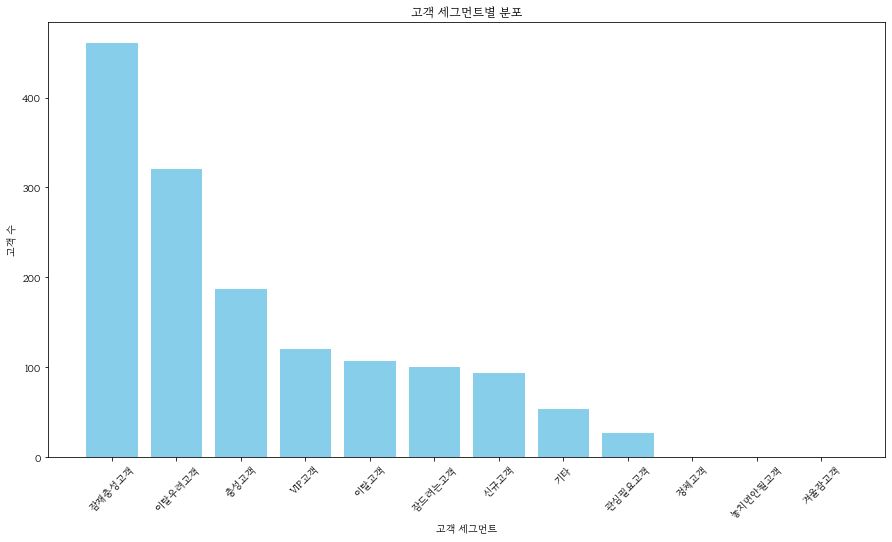

In [10]:
# 가능한 모든 세그먼트 정의
all_segments = ['VIP고객', '충성고객', '잠재충성고객', '신규고객', '정체고객', '관심필요고객', 
                '잠드려는고객', '이탈우려고객', '놓치면안될고객', '겨울잠고객', '이탈고객', '기타']

# 각 세그먼트별 고객 수 계산
segment_counts = rfm_data['Customer_Segment'].value_counts()

# 모든 세그먼트에 대한 고객 수를 0으로 초기화하고, 계산된 값으로 업데이트
segment_counts_all = {segment: 0 for segment in all_segments}
segment_counts_all.update(segment_counts)

# 데이터프레임으로 변환
segment_counts_df = pd.DataFrame(list(segment_counts_all.items()), columns=['Segment', 'Count'])

# 세그먼트별 고객 수를 내림차순으로 정렬
segment_counts_sorted_df = segment_counts_df.sort_values(by='Count', ascending=False)

# 바 그래프 시각화
plt.figure(figsize=(15, 8))
plt.bar(segment_counts_sorted_df['Segment'], segment_counts_sorted_df['Count'], color='skyblue')
plt.title('고객 세그먼트별 분포')
plt.xlabel('고객 세그먼트')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.show()